In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

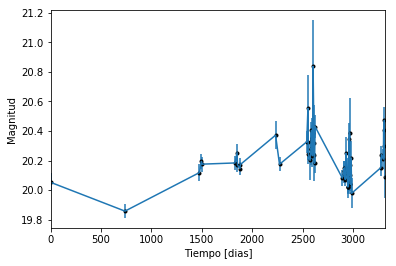

In [2]:
data = np.genfromtxt('LC_22275_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

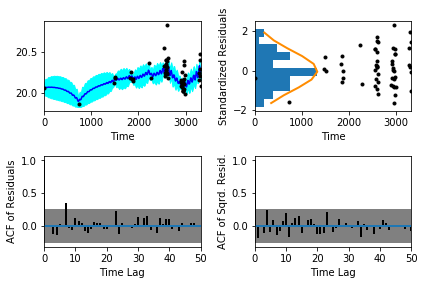

In [5]:
sample.assess_fit()

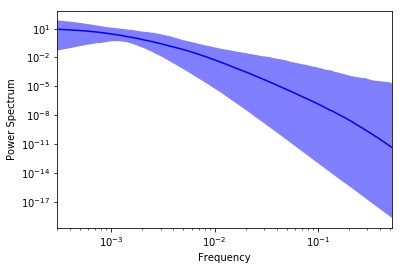

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.815683,'Medida del nivel de ruido')

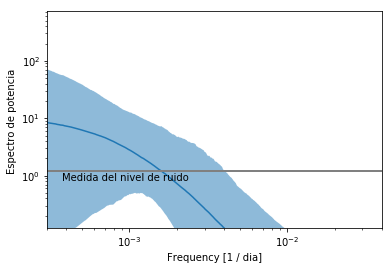

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

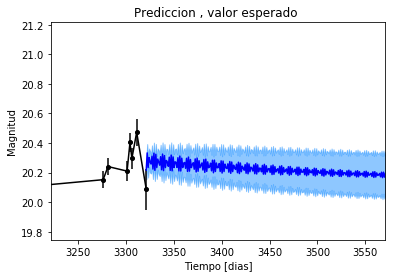

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

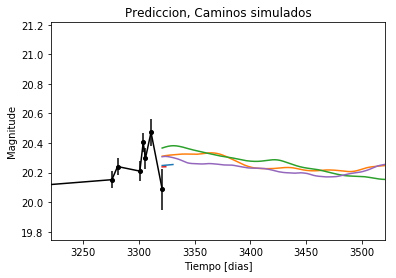

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


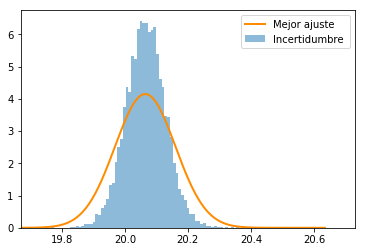

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

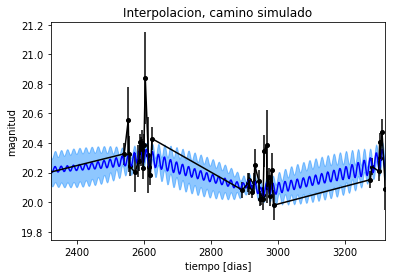

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

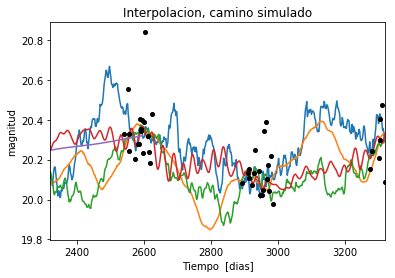

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 901.932291199
Median: 0.00693885350889
Standard deviation: 0.177965233966
68% credibility interval: [ 0.00064757  0.1253227 ]
95% credibility interval: [  3.35015855e-04   7.41795073e-01]
99% credibility interval: [  3.05322640e-04   9.43746547e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 893.637623939
Median: 0.00171961212964
Standard deviation: 0.0809630777325
68% credibility interval: [ 0.00045513  0.02853249]
95% credibility interval: [ 0.00031561  0.24013645]
99% credibility interval: [  3.03700367e-04   5.73854551e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 834.054714643
Median: 0.0151869086846
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1103.77970623
Median: 69.7935003343
Standard deviation: 1.54235002747
68% credibility interval: [ 68.01351618  70.81234121]
95% credibility interval: [ 65.63269402  71.39002822]
99% credibility interval: [ 63.8572942   72.85696852]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 613.9515154
Median: 0.512476859317
Standard deviation: 2.04007244769
68% credibility interval: [ 0.05319557  3.43146241]
95% credibility interval: [ 0.01457933  6.86429221]
99% credibility interval: [ 0.01009349  9.73100251]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 445.55026131
Median: 0.207763980574
Standard deviation: 8.74719654301
68% credibility interval: [  5.97770531e-03   7.69229867e+00]
95% credibility interval: [  4.2491

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 8318.55139563
Median: 5.28415097135e-19
Standard deviation: 1.503729058e+148
68% credibility interval: [  2.88751590e-83   1.53404912e+06]
95% credibility interval: [  1.59213446e-125   2.20339822e+093]
99% credibility interval: [  3.35119442e-137   1.34066497e+137]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1897.79333922
Median: 20.1458808188
Standard deviation: 0.0814441236126
68% credibility interval: [ 20.07379582  20.20476947]
95% credibility interval: [ 19.96169656  20.28595046]
99% credibility interval: [ 19.8498453   20.40322944]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 288.296100944
Median: 0.00548490673243
Standard deviation: 0.241542315274
68% credibility interval: [ 0.          0.34216761]
95% credibility interval: [ 0.          0.88518679]
99% credibility interval: [ 0.          1.00183837]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 288.296100944
Median: 0.00548490673243
Standard deviation: 0.241542315274
68% credibility interval: [ 0.          0.34216761]
95% credibility interval: [ 0.          0.88518679]
99% credibility interval: [ 0.          1.00183837]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 928.212046651
Median: 0.0
Standard deviation: 0.000680890934768
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1103.77970623
Median: 69.7935003343
Standard deviation: 1.54235002747
68% credibility interval: [ 68.01351618  70.81234121]
95% credibility interval: [ 65.63269402  71.39002822]
99% credibility interval: [ 63.8572942   72.85696852]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1405.82133213
Median: 0.0216008066997
Standard deviation: 0.0319700288746
68% credibility interval: [ 0.0120253   0.04421738]
95% credibility interval: [ 0.00725926  0.11439126]
99% credibility interval: [ 0.00532873  0.203746  ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2367.22211507
Median: 1.14492201648
Standard deviation: 0.176969998032
68% credibility interval: [ 0.99094605  1.33197016]
95% credibility interval: [ 0.84958956  1.54588059]
99% credibility interval: [ 0.74707842  1.69808963]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 925.413942078
Median: 3.16346910518e-05
Standard deviation: 0.114246291241
68% credibility interval: [  1.43344452e-10   4.83851705e-03]
95% credibility interval: [  9.17827513e-97   2.62382946e-01]
99% credibility interval: [  2.97488221e-140   6.40675709e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 901.932291199
Median: (-0.0435981024157+0j)
Standard deviation: 1.88510548801
68% credibility interval: [-0.78742577+0.j         -0.00406879-0.00732644j]
95% credibility interval: [ -4.66083590e+00+0.j         -2.10496669e-03-0.0025506j]
99% credibility interval: [ -5.92973444e+00+0.j          -1.91839872e-03-2.50699609j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 893.637623939
Median: (-0.010804641667+0j)
Standard deviation: 1.60064327628
68% credibility interval: [-0.17927494+0.44169613j -0.00285966+0.00218924j]
95% credibility interval: [-1.50882180+3.23430939j -0.00198304+1.53369209j]
99% credibility interval: [ -3.60563448e+00+2.77576093j  -1.90820569e-03+0.00673044j]
Posterior summary for parameter ar_roots 